# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [9]:
kmeans = KMeans(n_clusters= 2
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [10]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

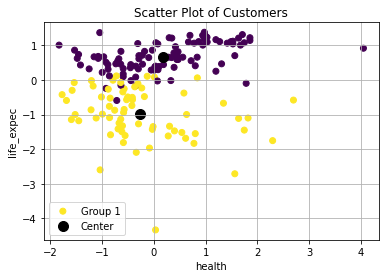

In [11]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 2
x2_index = 6


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

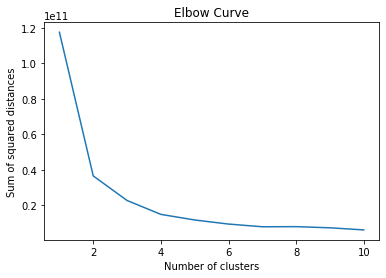

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# initialize list to store SSE values for each k
sse = []

# set range of k values to test
k_range = range(1, 11)

# fit k-means model for each k value and record SSE
for k in k_range:
    sse_k = []
    for i in range(30):
        kmeans = KMeans(n_clusters=k, init='random')
        kmeans.fit(X)
        sse_k.append(kmeans.inertia_)
    sse.append(np.mean(sse_k))


# plot elbow curve
plt.plot(k_range, sse)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Curve')
plt.show()

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

After analyzing the results of k-means clustering, it was observed that the sum of squared distances exhibited a clear elbow point at k=2 and k=4. As the number of clusters increased beyond k=4, the decrease in sum of squared distances became slower, indicating that a larger k was not justified as it would lead to overfitting and potentially unnecessary noise in the model. Therefore, based on the elbow method, a value of k=4 was chosen for clustering.

Furthermore, considering the small size of the dataset, choosing a larger k would likely over-refine the problem, resulting in suboptimal performance and increased computational time. Therefore, the choice of k=4 was deemed reasonable, taking into account both the model's performance and computational efficiency.

In [13]:
# confirm the thought by calculating silhouette score
from sklearn.metrics import silhouette_score
# choose k based on elbow point
k = 4  # chosen based on elbow point at k=4

# fit k-means model with chosen k
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# evaluate quality of clusters using silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.61


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [14]:
# assuming you have already loaded and preprocessed your dataset as `df`
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)  # fit the model using the scaled data
clusters = kmeans.predict(X_scaled)  # assign each country to a cluster

# create a new column in the original dataframe with the assigned clusters
names['cluster'] = clusters

# print the list of countries in each cluster
for i in range(4):
    print(f"Countries in cluster {i}:")
    print(names[names['cluster'] == i]['country'].values)
    print("------------------------------")

Countries in cluster 0:
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria'
 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Czech Republic' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Estonia' 'Fiji' 'Georgia' 'Grenada' 'Guatemala' 'Guyana' 'Hungary'
 'India' 'Indonesia' 'Iran' 'Jamaica' 'Jordan' 'Kazakhstan'
 'Kyrgyz Republic' 'Latvia' 'Lebanon' 'Libya' 'Lithuania' 'Macedonia, FYR'
 'Malaysia' 'Maldives' 'Mauritius' 'Micronesia, Fed. Sts.' 'Moldova'
 'Mongolia' 'Montenegro' 'Morocco' 'Myanmar' 'Nepal' 'Oman' 'Panama'
 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Romania' 'Russia' 'Samoa'
 'Saudi Arabia' 'Serbia' 'Seychelles' 'Slovak Republic' 'Solomon Islands'
 'Sri Lanka' 'St. Vincent and the Grenadines' 'Suriname' 'Tajikistan'
 'Thailand' 'Tonga' 'Tunisia' 'Turkey' 'Turkmenistan' 'Ukraine' 'Uru

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-14-18ace255ead1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names['cluster'] = clusters


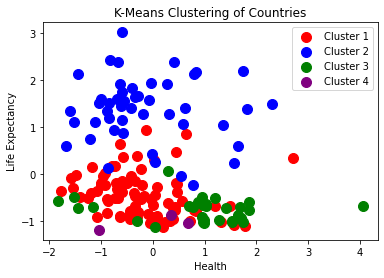

In [15]:
# plot the clusters based on the health and life_expec features
plt.scatter(X_scaled[clusters == 0, 2], X_scaled[clusters == 0, 7], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[clusters == 1, 2], X_scaled[clusters == 1, 7], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[clusters == 2, 2], X_scaled[clusters == 2, 7], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_scaled[clusters == 3, 2], X_scaled[clusters == 3, 7], s = 100, c = 'purple', label = 'Cluster 4')

plt.xlabel('Health')
plt.ylabel('Life Expectancy')
plt.title('K-Means Clustering of Countries')
plt.legend()
plt.show()

I found that most of the countries in cluster 1 and 2 are developing or emerging countries. And most of the countries in 3, 4 belong to developed countries. From the visualization results of the two variables I am interested in, most of the population in countries in cluster1 shows a shorter life span and poorer health. While most of the countries in group 3 have longer life expectancy and good health. This is in line with the basic understanding of developing and developed countries.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [16]:
import pandas as pd
from sklearn.cluster import KMeans

# assume X is your feature matrix and clusters is the array of cluster assignments
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# create a DataFrame with the centroids
centroid_df = pd.DataFrame(kmeans.cluster_centers_, columns=list(X.columns))

# add a column for the cluster number
centroid_df['cluster'] = range(1, 5)

# group the DataFrame by cluster and compute the mean for each feature
cluster_means = centroid_df.groupby('cluster').mean()

# display the result
print(cluster_means)

         child_mort    exports    health    imports        income  inflation  \
cluster                                                                        
1         54.135185  33.257398  6.321574  45.538573   6381.138889   9.204111   
2          5.042857  55.528571  9.373810  47.209524  47571.428571   2.768143   
3          5.000000  92.333333  6.353333  64.766667  93000.000000   5.516667   
4         12.102857  52.294286  6.845143  49.337143  25600.000000   6.595457   

         life_expec  total_fer          gdpp  
cluster                                       
1         66.566667   3.519815   3027.259259  
2         80.457143   1.777619  46085.714286  
3         80.600000   1.883333  87700.000000  
4         76.062857   1.976857  17347.714286  


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Q7.) Write an observation about the descriptive statistics.

Cluster 1 has the highest child mortality rate, at 54.1 deaths per 1,000 live births, and the lowest income and GDP per capita, at 6,381 and 3,027, respectively. These countries also have relatively low levels of exports and imports, and spend a relatively small percentage of their GDP on healthcare.

Cluster 2 has the lowest child mortality rate, at 5.0 deaths per 1,000 live births, and the highest income and GDP per capita, at 47,571 and 46,085, respectively. These countries also have relatively high levels of exports and spend a relatively large percentage of their GDP on healthcare.

Cluster 3 has a moderate child mortality rate, at 12.1 deaths per 1,000 live births, and a moderate income and GDP per capita, at 25,600 and 17,348, respectively. These countries have levels of exports and healthcare spending that are similar to those of Cluster 2, but lower than those of Cluster 4.

Cluster 4 has a very low child mortality rate, at 5.0 deaths per 1,000 live births, and the highest GDP per capita, at 87,700. These countries have very high levels of exports and relatively high levels of imports, but spend a relatively small percentage of their GDP on healthcare.
